## Analiza na podstawie danych IMGW 
źródło:'https://danepubliczne.imgw.pl/api/data/synop'

In [1]:
import pandas as pd 
import json
import requests
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
url = 'https://danepubliczne.imgw.pl/api/data/synop'

response = requests.get(url)

if response.status_code == 200:
    print('corretly contect with API')
    print('--------------------------')
    data = response.json()
    df = pd.DataFrame(data)
    print(df.head())
    print('--------------------------')
    print(df.info())
else:
    print('something is wrong! chceck status code:', response.status_code)
data = response.json()


corretly contect with API
--------------------------
  id_stacji         stacja data_pomiaru godzina_pomiaru temperatura  \
0     12295      Białystok   2025-05-16              11           8   
1     12600  Bielsko Biała   2025-05-16              11          10   
2     12235       Chojnice   2025-05-16              11         8.8   
3     12550    Częstochowa   2025-05-16              11        10.3   
4     12160         Elbląg   2025-05-16              11           7   

  predkosc_wiatru kierunek_wiatru wilgotnosc_wzgledna suma_opadu cisnienie  
0               3             140                88.9       10.2      1004  
1               8             240                61.4        2.9    1012.4  
2               4             350                79.0        6.9    1010.7  
3               4             280                73.9        1.5    1009.5  
4               7             350                82.8       26.1    1008.2  
--------------------------
<class 'pandas.core.frame.DataF

In [3]:
df.drop_duplicates()
df.isnull().sum()

id_stacji              0
stacja                 0
data_pomiaru           0
godzina_pomiaru        0
temperatura            1
predkosc_wiatru        0
kierunek_wiatru        0
wilgotnosc_wzgledna    1
suma_opadu             0
cisnienie              4
dtype: int64

## Top 3 najcieplejsze miejsca w Polsce na dzień analizy

In [4]:
df_top_temp = df[['stacja', 'data_pomiaru', 'temperatura']]
df_top_temp = df_top_temp.sort_values(by='temperatura',ascending=False)
df_top_temp.head(3)

,stacja,data_pomiaru,temperatura
24,Lębork,2025-05-16,9.4
15,Koło,2025-05-16,9.3
39,Racibórz,2025-05-16,9.1


Top 3 najcieplejsze miejsca w Polsce na dzień analizy (16.05.2025) kolejno:
1. Sandomierz
2. Krosno
3. Kraków

## Top 3 poziom ciśnienia w Polsce


In [5]:
df_top_pressure = df[['stacja', 'data_pomiaru', 'temperatura', 'cisnienie']]
df_top_pressure = df_top_pressure.sort_values(by='cisnienie', ascending=False)
df_top_pressure.head(3)

,stacja,data_pomiaru,temperatura,cisnienie
50,Świnoujście,2025-05-16,12.9,1015.5
47,Szczecin,2025-05-16,13.2,1014
16,Kołobrzeg,2025-05-16,11.1,1014


Top 3 miejsca o najwyższym ciśnieniu na dzień analizy(16.05.2025) kolejno:
1.Świnoujście
2.Szczecin
3.Kołobrzeg

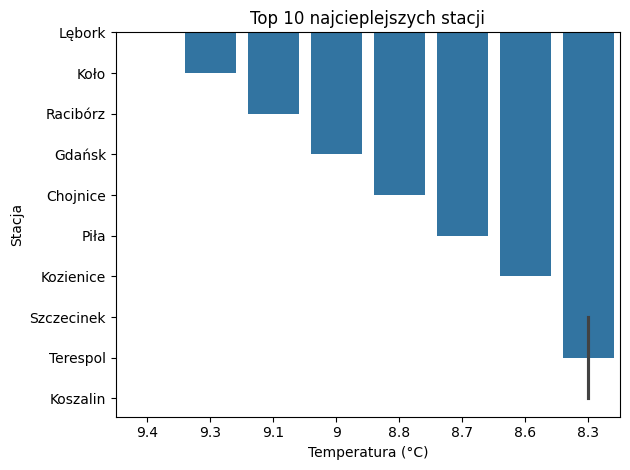

In [6]:
sns.barplot(data=df.sort_values(by= 'temperatura',ascending=False).head(10), x='temperatura', y='stacja')
plt.title("Top 10 najcieplejszych stacji")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Stacja")
plt.tight_layout()
plt.show()

## Generownie oputputs

In [13]:
df_top_temp.to_excel('../output/top temp.xlsx', index= False)
df_top_pressure.to_excel('../output/top pressure.xlsx', index=False)

## Wnioski


Podczas analizy pobrano aktualne dane z IMGW, przekształcono, wyodrębniono potrzebne dane do stworzenia top 3 miejsc z najwyższą temperaturą oraz ciśnieniem - brak korelacji.

## Co dalej?

Raport może slużyć do odkładania danych z każdego dnia oraz tworzenia wykresu średniej temperatury  oraz średniego poziomu ciśnienia w Polsce każdego dnia począwszy od dnia dzisiejszego tj. 16.05.2025